---
## <b>1 <span style='color:#3f4d63'>I</span> Introduction</b>
---

### **Competition's Goal**

The goal of this competition is to assess the language proficiency of 8th-12th grade English Language Learners (ELLs). Utilizing a dataset of essays written by ELLs will help to develop proficiency models that better supports all students.

Your work will help ELLs receive more accurate feedback on their language development and expedite the grading cycle for teachers. These outcomes could enable ELLs to receive more appropriate learning tasks that will help them improve their English language proficiency.

![](https://www.caracteristicas.co/wp-content/uploads/2017/05/textos-literarios-1-e1569197016482.jpg)

### **Data Description**

The dataset presented here (the ELLIPSE corpus) comprises argumentative essays written by 8th-12th grade English Language Learners (ELLs). The essays have been scored according to six analytic measures: cohesion, syntax, vocabulary, phraseology, grammar, and conventions.

Each measure represents a component of proficiency in essay writing, with greater scores corresponding to greater proficiency in that measure. The scores range from 1.0 to 5.0 in increments of 0.5. Your task is to predict the score of each of the six measures for the essays given in the test set.

#### **Importing packages ⬇️**

In [1]:
from IPython.display import clear_output, display_html
import os
import warnings
from pathlib import Path

# Basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
from scipy import stats

# Train Test Split
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, learning_curve, train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


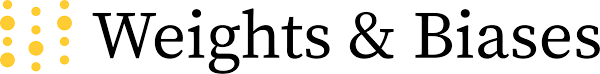

### **Weights and Biases ⬇️**

You will need a unique API key to log in to Weights & Biases.

* If you don't have a Weights & Biases account, you can go to [https://wandb.ai/site](https://wandb.ai/site) and create a FREE account. Access your API key: [https://wandb.ai/authorize](https://wandb.ai/authorize).

There are two ways you can login using a Kaggle kernel:

* Run a cell with `wandb.login()`. It will ask for the API key, which you can `copy` + `paste` in.
* You can also use Kaggle secrets to store your API key and use the code snippet below to login. Check out [this discussion post](https://www.kaggle.com/product-feedback/114053) to learn more about Kaggle secrets.

In [2]:
!pip install wandb
clear_output()
import wandb
from wandb.keras import WandbCallback

try:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    api_key = user_secrets.get_secret("wandb_api")
    wandb.login(key=api_key)
    anony = None
except:
    anony = "must"
    print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


---
## <b>2 <span style='color:#3f4d63'>I</span> Exploratory Data Analysis</b>
---

## **Basic Information**

To start with we're going to get a first insight from the data we're given. In order to do so, we'll implement two different functions: 

* The first one is going to load each of the datasets given. 
* The second one will give us some basic information about each dataset.

In [3]:
def load_data():
    '''Load each of the datasets we are given.'''
    
    data_dir = Path("../input/feedback-prize-english-language-learning")
    train = pd.read_csv(data_dir / "train.csv")
    test = pd.read_csv(data_dir / "test.csv")
    sample_submission = pd.read_csv(data_dir / 'sample_submission.csv')
    return train, test, sample_submission

from termcolor import colored
def data_info(csv, name="Train"):
    '''Prints basic information about the datasets we are given.'''
    '''Inspired by: https://www.kaggle.com/code/andradaolteanu/rsna-fracture-detection-dicom-images-explore'''
    
    print(colored('==== {} ===='.format(name), 'blue', attrs=['bold']))
    print(colored('Shape: ', 'blue', attrs=['bold']), csv.shape)
    print(colored('NaN Values: ', 'blue', attrs=['bold']), csv.isnull().sum().sum(), '\n')
    #print(colored('Columns: ', 'blue', attrs=['bold']), list(csv.columns))
    
    display_html(csv.head())
    if name != 'Sample Submission': print("\n")

train, test, sample_submission = load_data()
clear_output()

names = ["Train", "Test", "Sample Submission"]
for i, df in enumerate([train, test, sample_submission]): 
    data_info(df, names[i])

==== Train ====
Shape:  (3911, 8)
NaN Values:  0 



,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5




==== Test ====
Shape:  (3, 2)
NaN Values:  0 



,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."




==== Sample Submission ====
Shape:  (3, 7)
NaN Values:  0 



,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.0,3.0,3.0,3.0,3.0,3.0
1,000BAD50D026,3.0,3.0,3.0,3.0,3.0,3.0
2,00367BB2546B,3.0,3.0,3.0,3.0,3.0,3.0


* The essays are given a score for each of the seven analytic measures above: cohesion, etc. These analytic measures comprise the target for the competition. Therefore, let's analyse them a little bit.

In [4]:
train.select_dtypes(['int','float']).describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.000000,3.127077,0.662542,1.000000,2.500000,3.000000,3.500000,5.000000
syntax,3911.000000,3.028254,0.644399,1.000000,2.500000,3.000000,3.500000,5.000000
vocabulary,3911.000000,3.235745,0.583148,1.000000,3.000000,3.000000,3.500000,5.000000
phraseology,3911.000000,3.116850,0.655997,1.000000,2.500000,3.000000,3.500000,5.000000
grammar,3911.000000,3.032856,0.699841,1.000000,2.500000,3.000000,3.500000,5.000000
conventions,3911.000000,3.081053,0.671450,1.000000,2.500000,3.000000,3.500000,5.000000


* Essay example:

In [5]:
train['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

* One thing that you may have noticed is that in the text there are some programming symbols like `\n`. Let's start by getting rid of them.

In [6]:
import re

train['full_text'] = train["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)
test['full_text'] = test["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex=True)

Another issue that we'll face with this data is bad spacing with commas and dots. Let me show you an example: 

In [7]:
from nltk.tokenize import word_tokenize
from collections import Counter 

corpus = ''.join(train.full_text)
d = Counter(corpus.split())
words_counting = pd.DataFrame({'words':list(d.keys()), 'count':list(d.values())})
words_counting['word_len'] = words_counting['words'].apply(lambda x: len(x))
words_counting = words_counting.sort_values(by = 'word_len', ascending = False)

In [8]:
words_counting['words'].head(1)

10471    ride,rock-climb,roller-skating,surfing,camping...
Name: words, dtype: object

At first, it seems that there will be no problem about that. `word_tokenizer` actually distinguish clearly one word from another. However, one of the pre-processing NLP steps is to remove punctuation symbols (which will be done after in this notebook). What is gonna happend when we replace commas for `""` ? 

* Exactly, we'll obtain **large sequence of different words without any spacing**. And we do not want that. Thus, we'll have to do something with it.   

Another strange feature of this dataset is that you'll find a lot of texts with expressions such as `Dear Generic_Name` or `I'm from Generic_City`. Let's explore how much of them there are. 

In [9]:
print('Amount of Generic Sequences: ',words_counting[words_counting.words.str.contains('Generic')]['count'].sum())

Amount of Generic Sequences:  1769


* One quick example: 

In [10]:
for text in train.full_text: 
    for w in text.split(): 
        if w == 'Generic_Name,Generic_Name,':
            print(text)
            break

"Where is one place in the world you would like to visit?"  "We should to go to  Generic_City over the summer, and talk to new people!" I excitedly told my friends 3 weeks before the school was gonna end. My friends, Generic_Name,Generic_Name, Generic_Name, and I think that Generic_City is the best place that we can go visit, because it can be a very exiting experience, and we can go out to see the Eiffel Tower, and experience the life of other people.  First I would visit the Eiffel tower with my friends.  The amazing height of the Eiffel tower. When we were walking to go see the Eiffel tower, it didn't seem big, but when we got closer, it seemed huge, I was shocked because I never knew that it was very huge. Then on the top of the Eiffel Tower, the city can be seen. As we were on the top of the Eiffel tower I could not believe that I could see the beautiful view of the lights of the city. Finally we took pictures of the the beautiful surroundings of the Tower. My friends were very ha

## **Scoring Measurements Analysis**

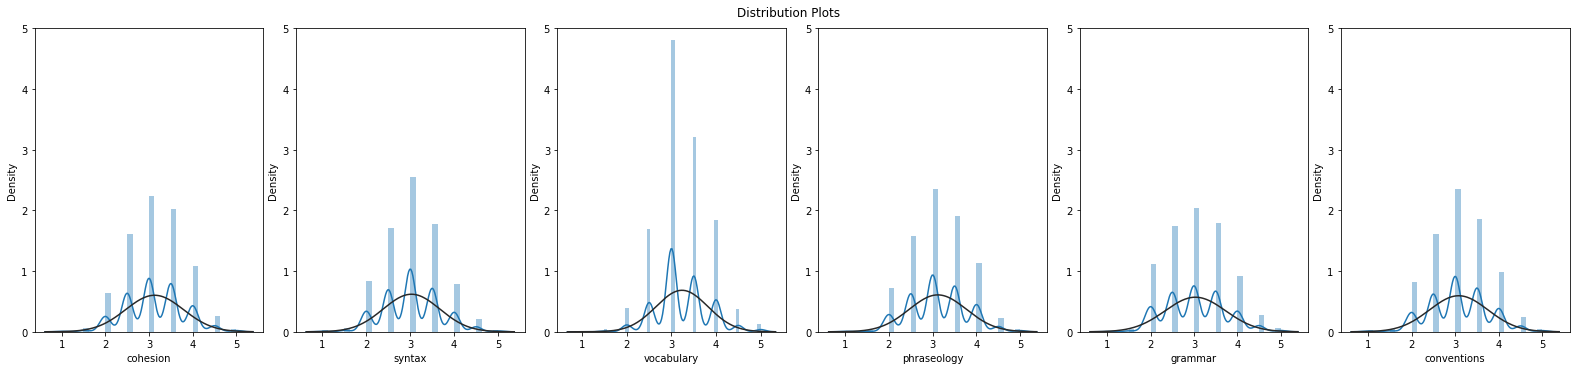

In [11]:
from scipy import stats

figure = plt.figure(figsize = (22,5))
for i, col in enumerate(train.select_dtypes(['int','float']).columns): 
    ax = plt.subplot(1, 6, i+1)
    if train[col].dtype == 'int': 
        sns.distplot(train[col], fit=stats.norm, color = 'red')        
    else: 
        sns.distplot(train[col], fit=stats.norm)        
    ax.set_ylim((0.0, 5.0))
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Distribution Plots', y=1.02)
plt.show()

Let's consider that getting more than 2.5 in a scoring measurement, means that it's passed. Taking this into account let's analyse how is the balance between failures and passes.

* **Insight**: there are much more passes than failures, in each of the scoring measurements. 

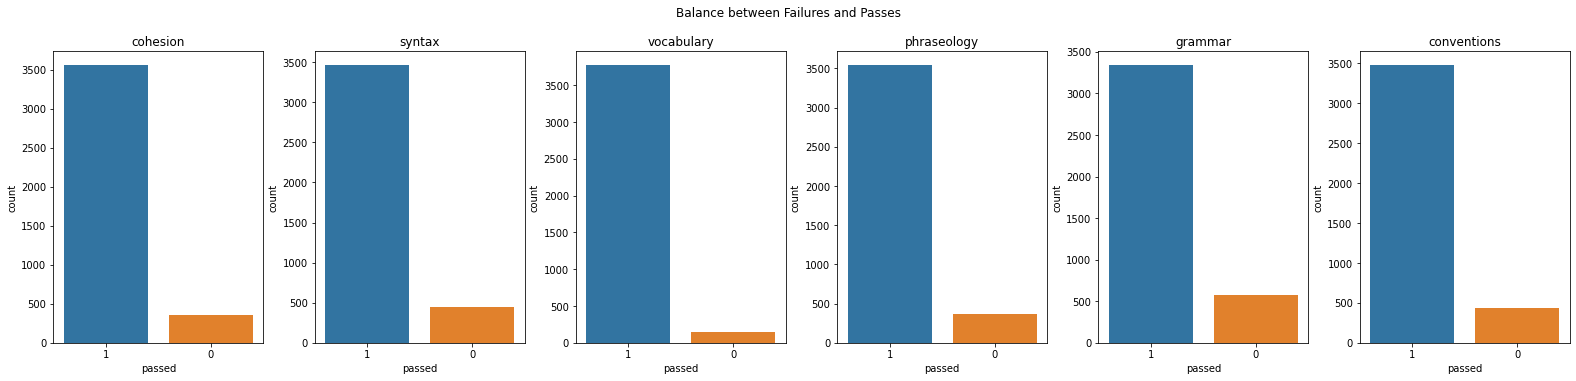

In [12]:
figure = plt.figure(figsize = (22,5))
for i, col in enumerate(train.select_dtypes(['int','float']).columns[:6]):
    ax = plt.subplot(1, 6, i+1)
    conditionlist = [(train[col] >= 2.5), (train[col] < 2.5)]
    choicelist = [1,0]
    train['passed'] = np.select(conditionlist, choicelist, default='Not Specified')    
    sns.countplot(train.passed, label = ['Failures','Passes'])
    del train['passed']
    ax.set_title(col)
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Balance between Failures and Passes', y=1.05)
plt.show()

Let's now examine the total punctuation obtained by each essay. In other words, we're gonna sum all the scores given to obtain `total_score`. 

Text(0.5, 1.0, 'Character Count')

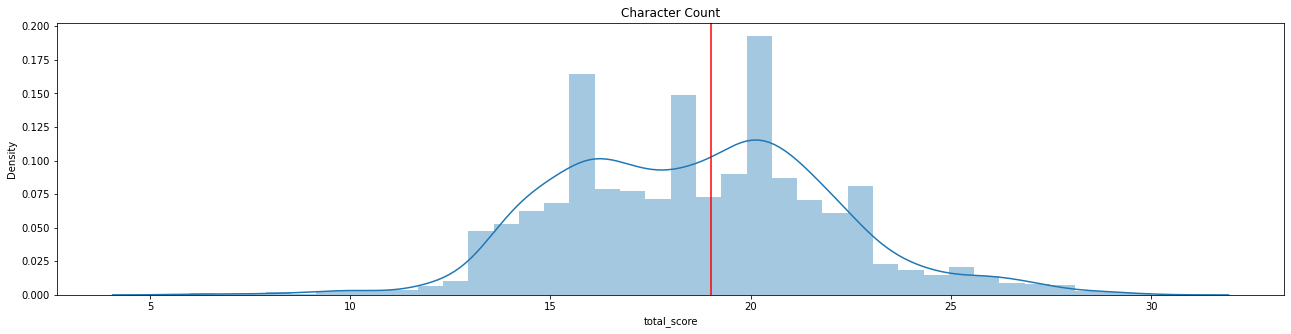

In [13]:
train['total_score'] = train['cohesion'] + train['syntax'] + train['vocabulary'] + \
                       train['phraseology'] + train['grammar'] + train['conventions']

avg_char = round(train['total_score'].mean())
plt.figure(figsize = (22,5))
sns.distplot(train['total_score'])
plt.axvline(x = avg_char, color = 'red')
plt.title('Character Count')

* Quick example of a perfect essay (score = 30.0): 

In [14]:
train['full_text'][2389]

"I agree with Michelangelo's statement as I have found through experience that it benefits me more to set high expectations and not reach my goal, rather than settling on a low goal and achieving it. When setting high goals, I find that I learn more and progress my abilties further than I do with a lower goal. This is because setting high goals requires confidence, challenges, and pride.  Firstly, hard work is required to achieve high goals, and requires confidence. Confidence involves having trust and believing that you are capable of accomplishing something. I have found that when I set high goals, I feel more confident in my abilities. With lower goals however, my confidence is lower as I settle for the easier path and do not trust myself to do better. With a higher aim, my confidence motivates me to not give up. I tend to try harder, and always believe in myself. For example, at school, I had to choose whether I wanted to try out for the varsity tennis team or remain in the club te

## Character Count

In [15]:
train['ncharacters'] = train['full_text'].str.len()
avg_char = round(train['ncharacters'].mean())
max_char = round(train['ncharacters'].max())
print('Average length: {}'.format(avg_char))
print('Max length: {}'.format(max_char))

Average length: 2335
Max length: 6044


Text(0.5, 1.0, 'Character Count')

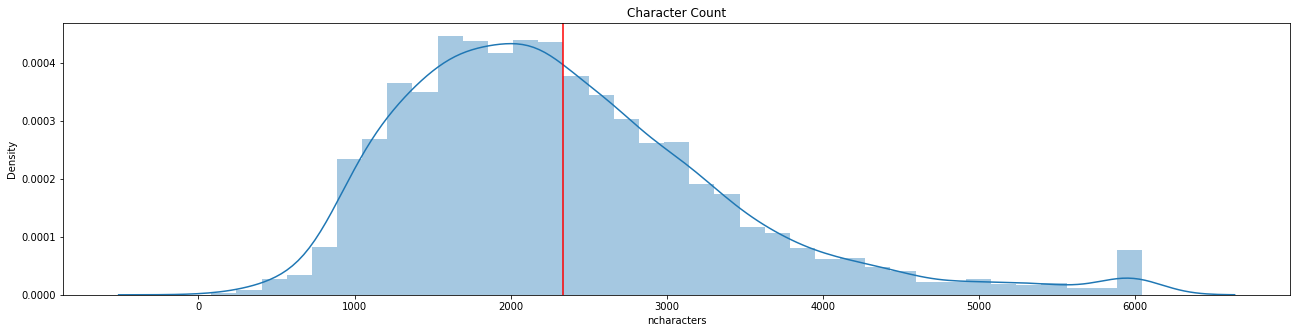

In [16]:
plt.figure(figsize = (22,5))
sns.distplot(train['ncharacters'])
plt.axvline(x = avg_char, color = 'red')
plt.title('Character Count')

## Word Count

Let's look at the word count distribution across the dataset. The token count will inform settings for our model, like max sequence length and the types of model architectures we can use. Only some are suitable for very long sequences.

In [17]:
train['nwords'] = train['full_text'].apply(lambda x: len(x.split()))
avg_words = round(train['nwords'].mean())
max_words = round(train['nwords'].max())
print('Average length: {}'.format(avg_words))
print('Max length: {}'.format(max_words))

Average length: 430
Max length: 1260


Text(0.5, 1.0, 'Word count')

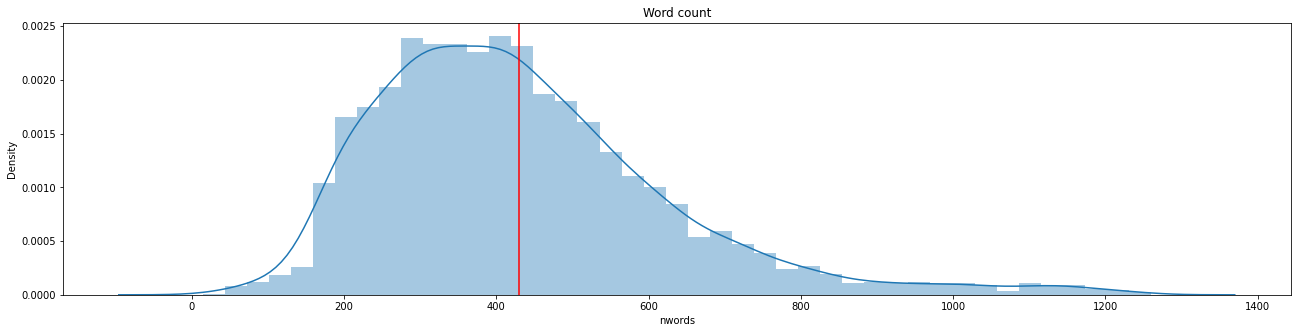

In [18]:
plt.figure(figsize = (22,5))
sns.distplot(train['nwords'])
plt.axvline(x = avg_words, color = 'red')
plt.title('Word count')

In [19]:
def plot_distribution_per_score(c): 
    scores = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
    figure, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (22,5))
    for i, col in enumerate(scores):
        conditionlist = [
        (train[col] >= 4.5) ,
        (train[col] >= 2) & (train[col] < 4.5),
        (train[col] < 2)]
        choicelist = ['High', 'Mid', 'Low']
        train['performance'] = np.select(conditionlist, choicelist, default='Not Specified')

        mask = train.performance != 'Mid'
        sns.kdeplot(train[mask][c], hue = train.performance, ax = axes[i])
        axes[i].set_title(col)

        mask_low = train.performance == 'Low'
        avg_low = train[mask_low][c].mean()
        axes[i].axvline(x = avg_low, color = 'green', linestyle = '--')

        mask_high = train.performance == 'High'
        avg_high = train[mask_high][c].mean()
        axes[i].axvline(x = avg_high, color = 'orange', linestyle = '--')

        del train['performance']

Let's observe how word count is distributed depending on scores. 

* Word count tend to be greater for those essays having great scores. Except for `grammar`, where both means are almost equal.

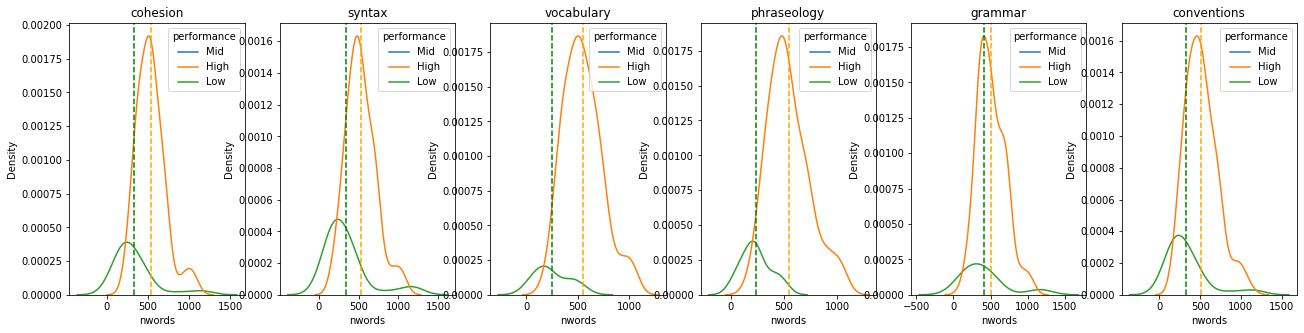

In [20]:
plot_distribution_per_score('nwords')

## **Sentence Count and Average Length**

In [21]:
from nltk.tokenize import sent_tokenize

train['sent_count'] = train['full_text'].apply(lambda x: len(sent_tokenize(x)))
avg_sent = round(train['sent_count'].mean())
print('Average Count: {}'.format(avg_sent))

train['avg_sent_len'] = train['full_text'].apply(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))
avg_sent_len = round(np.mean(train['avg_sent_len']))
print('Average Sentence Length: {}'.format(avg_sent_len))

Average Count: 18
Average Sentence Length: 30


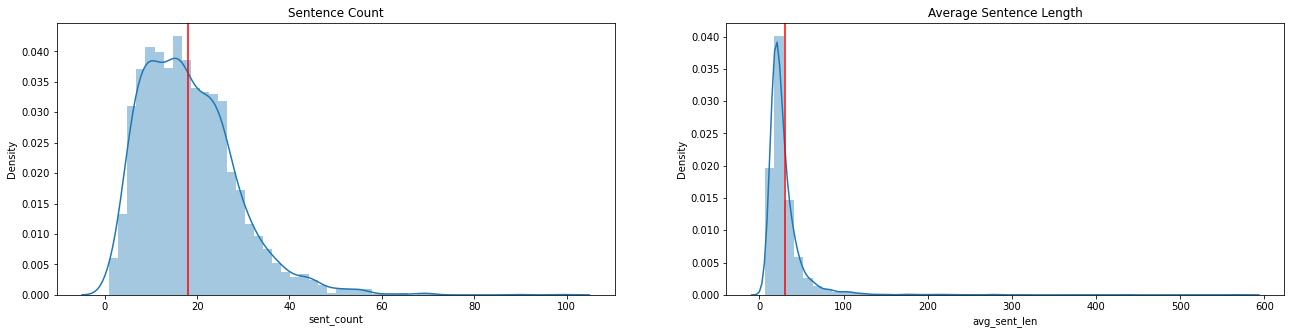

In [22]:
plt.figure(figsize = (22,5))
for i, col in enumerate(['sent_count','avg_sent_len']):
        title = 'Sentence Count' if i == 0 else 'Average Sentence Length'
        mean = avg_sent if i == 0 else avg_sent_len 
        ax = plt.subplot(1, 2, i+1)
        sns.distplot(train[col])
        ax.axvline(x = mean, color = 'red')
        ax.set_title(title)

Let's examine again scores. As we can appreciate below, low graded essays tend to have longer sentences in terms of words. This happens for each of the measurements.

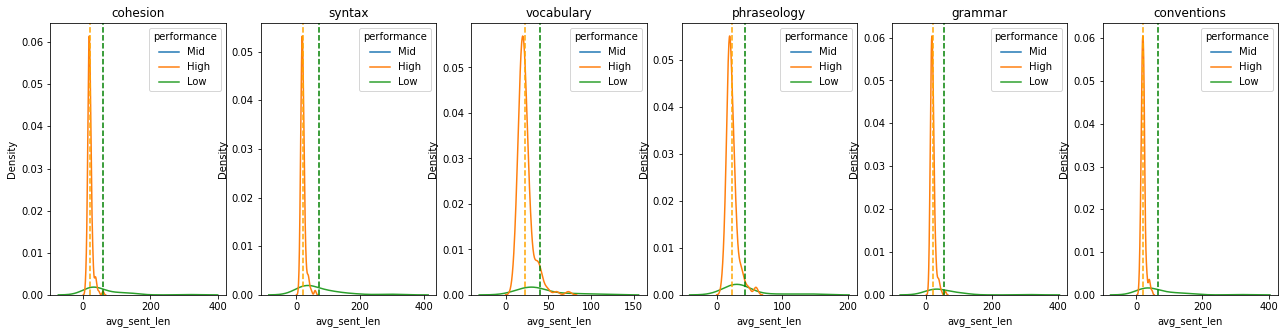

In [23]:
plot_distribution_per_score('avg_sent_len')

## Stop Words

> By **stop words** we are referring to a **set of commonly used words** in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to get eliminated, allowing applications to focus on the important words instead.
>
> More info here -> [stop words tutorial](https://www.etutorialspoint.com/index.php/375-how-to-find-stop-words-in-nltk-python)

In [24]:
import nltk
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words('english'))
print("List of english stopwords -")
print(eng_stopwords)

List of english stopwords -
{'off', 'y', 'your', 'until', 'is', "weren't", 'through', 'doesn', "you'd", 'into', 'further', 'there', 'about', "aren't", 'do', 'down', 'at', 'during', 'only', 'me', 'who', 'now', 'before', 'him', 'i', "haven't", 'them', "couldn't", 'has', 'be', 'have', 'after', 'over', 'ours', 'some', 'then', 'more', 'theirs', 'most', 'not', 'wasn', 'ma', 'that', 'should', 'herself', 'am', 'hasn', 'up', 'mightn', 'was', 'too', "doesn't", "don't", 'both', 'itself', "didn't", 'any', 'very', 'their', 'll', "you've", 'were', 'when', 'ourselves', 'each', 'it', "should've", "shan't", 'shouldn', 'in', "mustn't", 'own', "that'll", 'having', "she's", 'few', 'doing', 'and', 'our', 'with', 'above', 'between', 'themselves', 't', 'needn', 'an', 'her', 'weren', 'these', 'himself', 'the', 'under', 'you', 'because', 'wouldn', 'we', 's', 'won', 'same', 'such', 'did', 'here', 'my', 'whom', "wouldn't", 'been', "you'll", 'but', 'o', 'isn', 'mustn', "mightn't", "shouldn't", 'while', 'they', 'w

<BarContainer object of 10 artists>

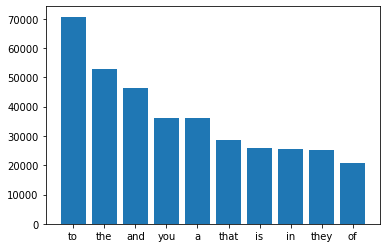

In [25]:
'''Inspired by: https://www.kaggle.com/code/ryanluoli2/simple-text-analysis-to-start-with
                https://www.etutorialspoint.com/index.php/375-how-to-find-stop-words-in-nltk-python'''

import operator
from collections import defaultdict

corpus = ''.join(train.full_text).split()
dic = defaultdict(int)

for w in corpus: 
    if w in eng_stopwords: 
        dic[w] += 1
        
dic_sorted = sorted(dic.items(), key = operator.itemgetter(1), reverse = True)
x, y = zip(*dic_sorted[:10])
plt.bar(x,y)

## Most Frequent N-Grams

> **What’s an n-gram?** It’s a sequence of n words in a text. For example, the bi-grams (n = 2) for the sentence “How are you today?” would be: “How are”, “are you”, and “you today”. The tri-grams (n =3) would be “How are you” and “are you today”.
>
> For more detailed explanation -> [Fundamental EDA Techniques for NLP](https://towardsdatascience.com/fundamental-eda-techniques-for-nlp-f81a93696a75)


Before we begin, we need to preprocess the text by changing everything to lowercase, and removing all punctuations and non-Roman characters.

In [26]:
import string

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)    
    return text

train_copy = train.copy()
train_copy['full_text'] = train_copy['full_text'].map(lambda x: clean_text(x))

The cleaned review texts look like this:

In [27]:
train_copy['full_text'][0]

'i think that students would benefit from learning at homebecause they wont have to change and get up early in the morning to shower and do there hair taking only classes helps them because at there house theyll be pay more attention they will be comfortable at home  the hardest part of school is getting ready you wake up go brush your teeth and go to your closet and look at your cloths after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain then youll have to change with the online classes you can wear anything and stay home and you wont need to stress about what to wear  most students usually take showers before school they either take it before they sleep or when they wake up some students do both to smell good that causes them do miss the bus and effects on there lesson time cause they come late to school when u have online classes u wont need to miss lessons cause you can get everything set up and go take a shower and wh

To get the most frequent words, we first need to create a so-called “corpus”. That means we create a list containing all relevant words from the cleaned review texts. By “relevant” word, I mean words that aren’t stopwords. Let's write a function to do it.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

def most_freq_ngrams(s1 = 2, s2 = 2):
    '''Return most frequent N-Grams for a size given.'''
    
    # Initialize CountVectorizer
    vec = CountVectorizer(stop_words = eng_stopwords, ngram_range = (s1, s2))

    # Matrix of ngrams
    bow = vec.fit_transform(train_copy["full_text"])

    # Count frequency of ngrams
    count_values = bow.toarray().sum(axis=0)

    # Create DataFrame from ngram frequencies
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]
    
    return ngram_freq

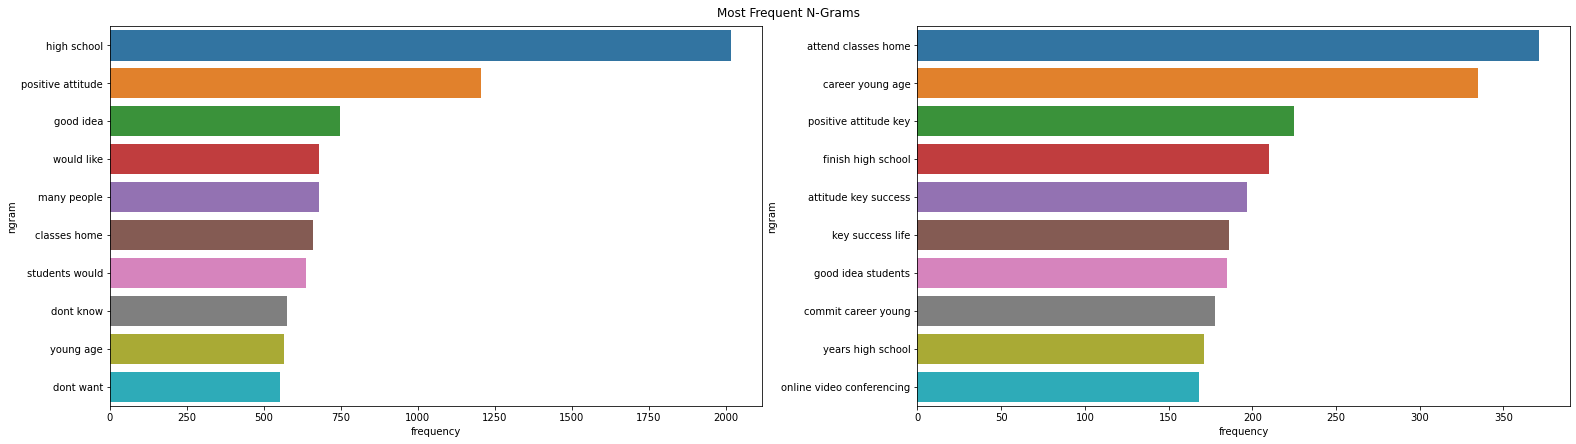

In [29]:
figure, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (22, 6))
for i in range(2,4):
    ngram_freq = most_freq_ngrams(i, i)
    sns.barplot(data = ngram_freq[:10], x = 'frequency', y = 'ngram', ax = axes[i-2])
    del ngram_freq
    
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Most Frequent N-Grams', y=1.02)
plt.show()

## **Part of Speech Tagging (POS)**

We’ll look at Part-of-Speech (POS) tagging and how to use it to get the most frequent adjectives, nouns, verbs, etc. In other words, with POS tagging, we are able to refine the EDA on the most frequent terms. E.g., you could explore, which adjectives or verbs are most common. POS tagging takes every token in a text and categorizes it as nouns, verbs, adjectives, and so on, as shown below:

In [30]:
from collections import Counter

def get_tokens(tags, tag_type = 'ADJ'): 
    '''Returns all the tokens that are tagged as "tag" in tags. '''
    
    t = [word for word, pos in tags if ((pos == tag_type) & ( word not in eng_stopwords))]
    return t

def show_most_common_tokens(tags, tag_type = 'ADJ', row = -1, col = -1): 
    '''Calculate the most commont tokens tagged as "tag_type" in tags. 
       Shows a Bar Plot with the results. '''
    
    adj_tags = get_tokens(tags, tag_type)
    
    # Count most common adjectives
    most_common = Counter(adj_tags).most_common(10)

    # Visualize most common tags as bar plots
    words, frequency = [], []
    for word, count in most_common:
        words.append(word)
        frequency.append(count)

    if col == -1: sns.barplot(x = frequency, y = words)
    else: sns.barplot(x = frequency, y = words, ax = axes[row][col])

* Quick example: below we are showing most common adjectives.

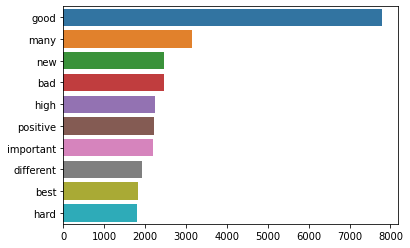

In [31]:
corpus_without_stop = [w for w in corpus if w not in eng_stopwords]
tags = nltk.pos_tag(corpus_without_stop, tagset = "universal")

show_most_common_tokens(tags, 'ADJ')

Hereafter, we are going to compare the most common tokens depending on each of the scores. The aim of this is to analyse which type of words appear more in low and high graded essays. 

Let's begin with **verbs**.

* We appreciate that auxiliary verb **would** leads every plot when talking about **high grades**. 
* The same happens in low graded plot, but with verb **go**. 
* Main difference between low and high graded essays' verbs: 
    * In high graded ones, there are **auxiliary verbs** like would, could, may, etc

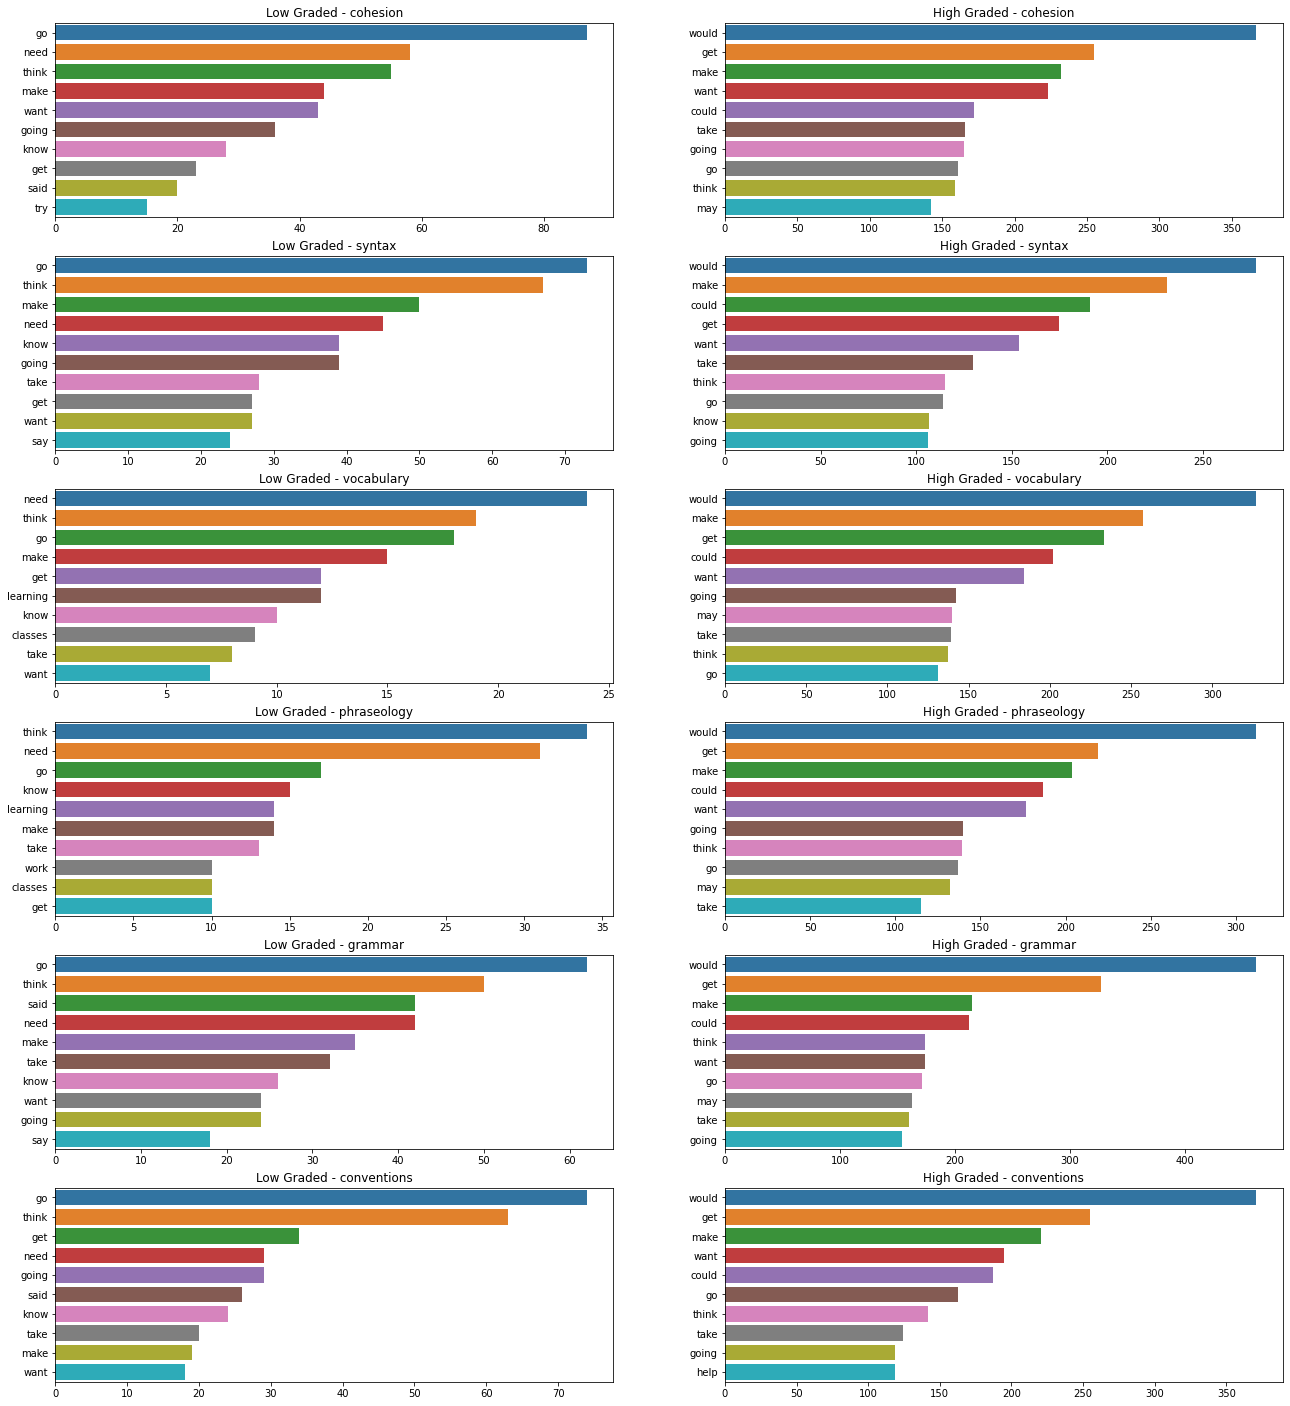

In [32]:
scores = ['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
figure, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (22,25))

for i, col in enumerate(scores):
    for j in range(2):
        
        t = 'Low' if j == 0 else 'High'
        title = '{} Graded - {}'.format(t, col)
        mask = train[col] < 2 if j == 0 else train[col] > 4
        
        corpus = ''.join(train[mask].full_text).split()
        corpus_without_stop = [w for w in corpus if w not in eng_stopwords]
        tags = nltk.pos_tag(corpus_without_stop, tagset = "universal")
        show_most_common_tokens(tags, 'VERB', i, j)
        axes[i,j].set_title(title)

Now, it's **nouns** turn:

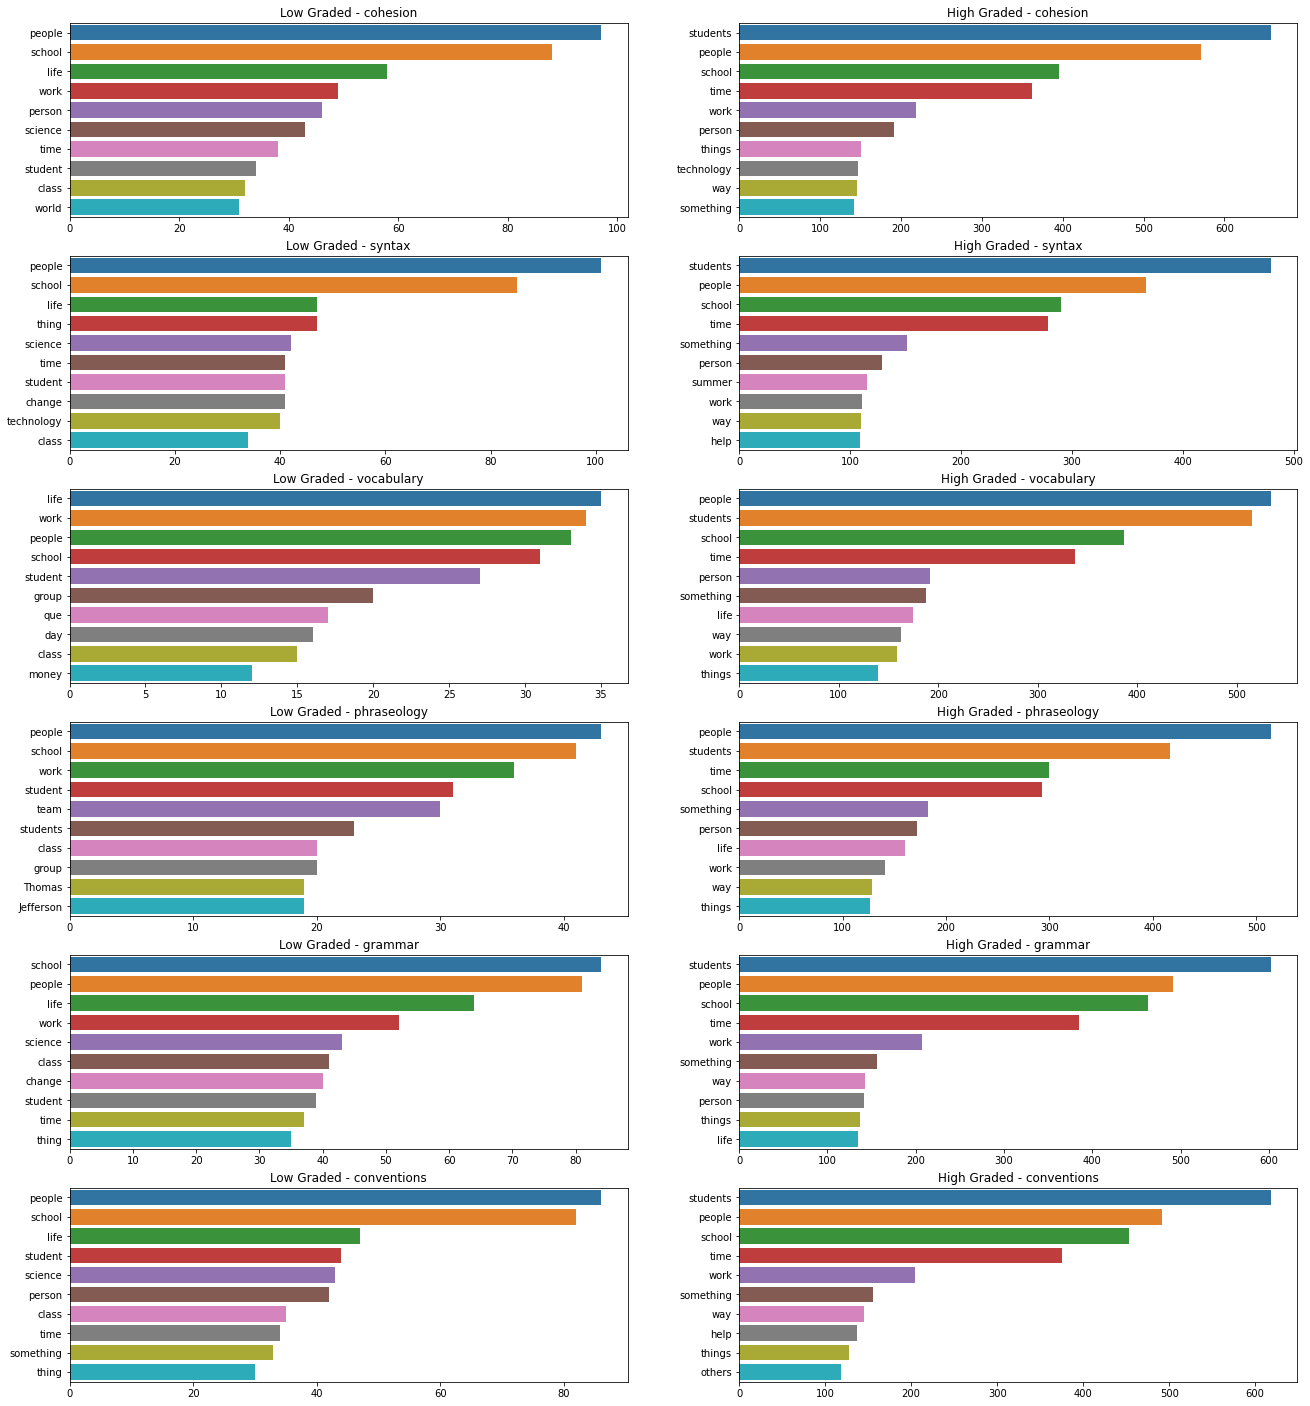

In [33]:
figure, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (22,25))
for i, col in enumerate(scores):
    for j in range(2):
        
        t = 'Low' if j == 0 else 'High'
        title = '{} Graded - {}'.format(t, col)
        mask = train[col] < 2 if j == 0 else train[col] > 4
        
        corpus = ''.join(train[mask].full_text).split()
        corpus_without_stop = [w for w in corpus if w not in eng_stopwords]
        tags = nltk.pos_tag(corpus_without_stop, tagset = "universal")
        show_most_common_tokens(tags, 'NOUN', i, j)
        axes[i,j].set_title(title)

## **Correlations**

By examining the following chart we can conclude the following: 

* High correlation between scoring measurements suggests that essays tend to have similar grades in each of the measurements. 

* `Avg_sent_len` is negatively correlated with every scoring measure. Thus, we can conclude that very long phrases could have a negative impact on how an essay is graded. This make sense when we observe `sent_count` as well. The shorter the phrases are, the more amount of phrases an essay has. That's the reason for its positive correlation with the scoring measurements.

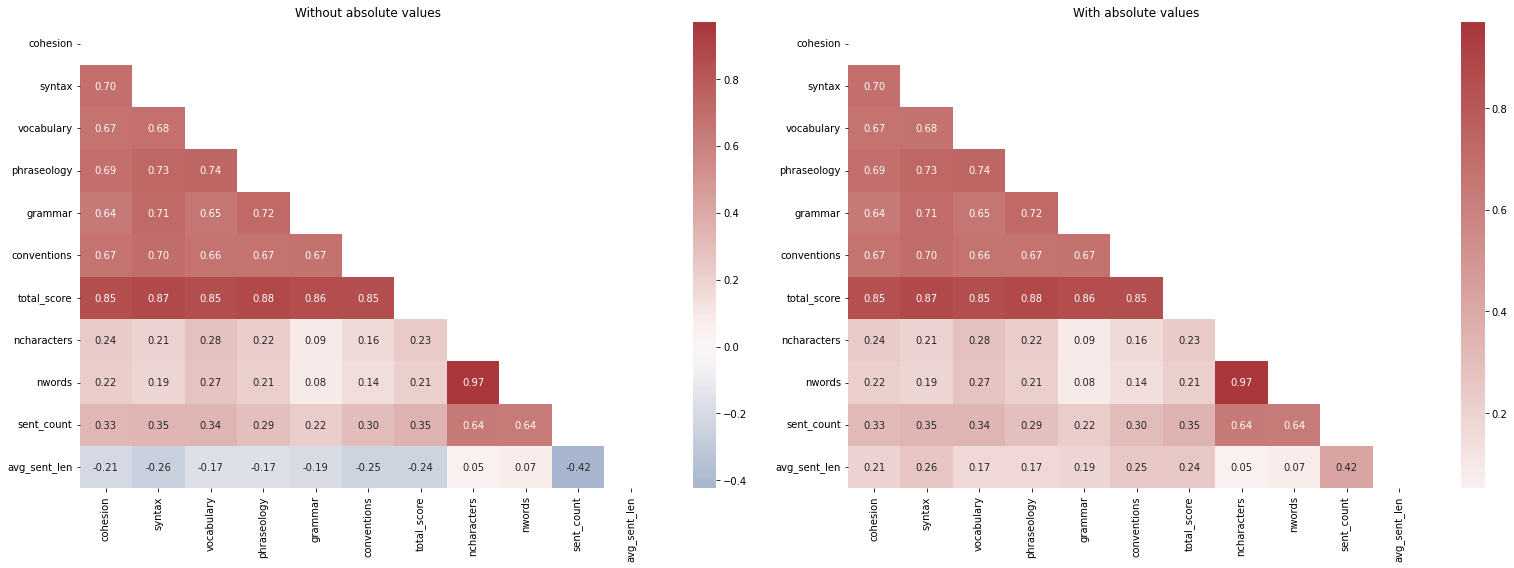

In [34]:
corr= train.select_dtypes(['int','float']).corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))
# Heatmap without absolute values
sns.heatmap(corr, mask=matrix, center = 0, cmap = 'vlag', ax = axes[0], 
            annot=True, fmt='.2f').set_title('Without absolute values')
# Heatmap with absolute values
sns.heatmap(abs(corr), mask=matrix, center = 0, cmap = 'vlag', ax = axes[1], 
           annot=True, fmt='.2f').set_title('With absolute values')

fig.tight_layout(h_pad=1.0, w_pad=0.5)

## **Lemmatization**

In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

![](https://miro.medium.com/max/1400/1*Kt9AbfaCIHCG2QjBckRVLg.png)

* Quick Example:

In [35]:
# Importing Lemmatizer library from nltk
nltk.download('omw-1.4')
clear_output()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


Let's **compare** now which **lemmas** are the most common ones in essays with a perfect grade (5.0) in **vocabulary and syntax**, and the ones with a low grade (less or equal than 2.0).

In [36]:
def most_common_lemmas(corpus): 
    '''Returns a dictionary with lemmas, sorted by frequency.'''
    
    dic = defaultdict(int)
    for w in corpus:
        lemma = lemmatizer.lemmatize(w)
        dic[lemma] += 1

    dic_sorted = sorted(dic.items(), key = operator.itemgetter(1), reverse = True)
    return dic_sorted

**Insights**

* Most common lemmas are shared between both types of essays. 
* However, from top 4/5 onwards the difference in technical lemmas start to be significant.

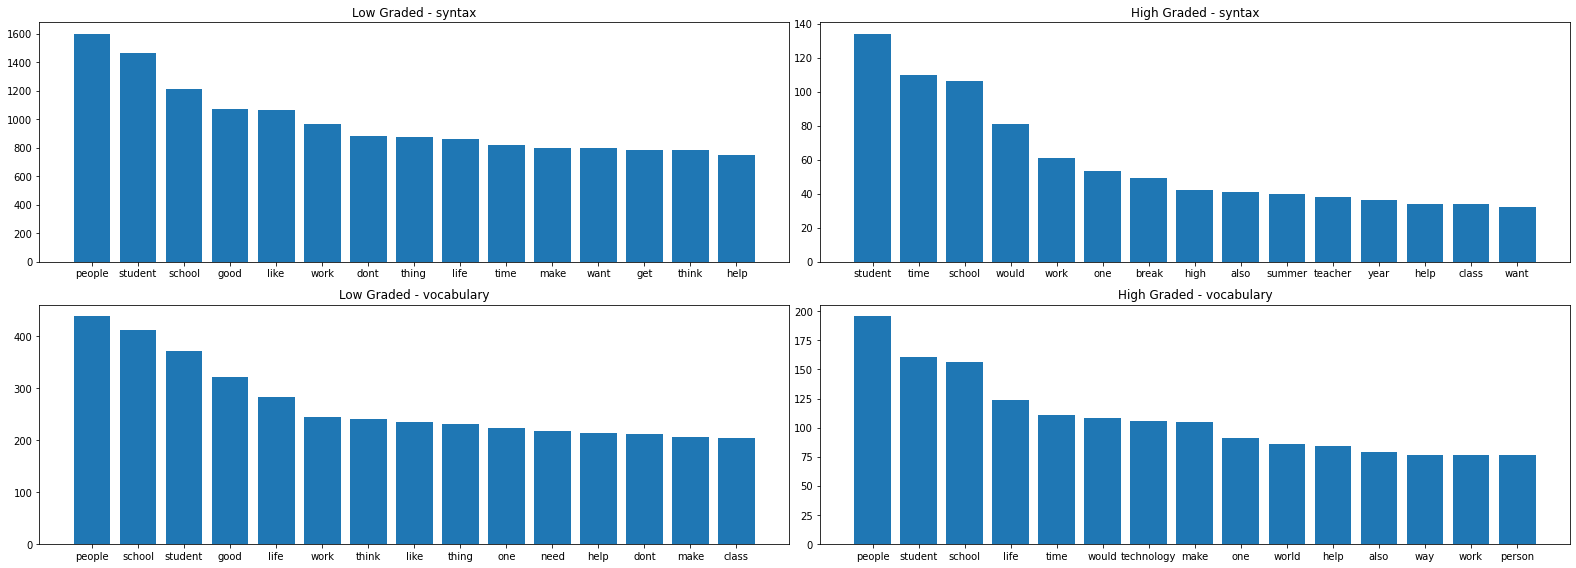

In [37]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,8))
for i, col in enumerate(['syntax','vocabulary']):    
    for j in range(2):
        t = 'Low' if j == 0 else 'High'
        title = '{} Graded - {}'.format(t, col)
        mask = train_copy[col] <= 2 if j == 0 else train_copy[col] == 5

        corpus = ''.join(train_copy[mask].full_text).split()
        corpus_without_stop = [w for w in corpus if w not in eng_stopwords]
        dic_sorted = most_common_lemmas(corpus_without_stop)
        x, y = zip(*dic_sorted[:15])
        axes[i, j].bar(x,y)
        axes[i, j].set_title(title)

figure.tight_layout(h_pad=1.0, w_pad=0.5)

## **Word Cloud**

> I invite you to read this article about word clouds limitations -> [Word Clouds are Lame](https://towardsdatascience.com/word-clouds-are-lame-263d9cbc49b7)

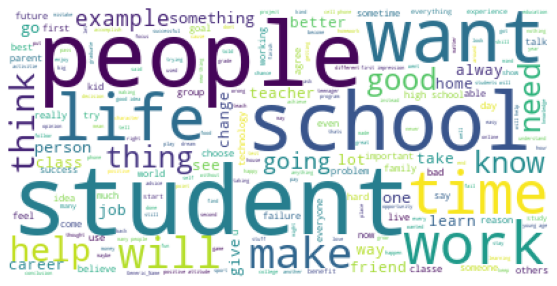

In [38]:
from wordcloud import WordCloud

corpus = ''.join(train['full_text'])
wordcloud = WordCloud(background_color='white').generate(corpus)
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Exploring through Text Complexity. Flesch Reading Ease (FRE)**

> Tutorial > [EDA for NLP](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)

Higher scores indicate material that is easier to read, lower numbers mark harder-to-read passages:

Text(0.5, 1.0, 'Text Complexity')

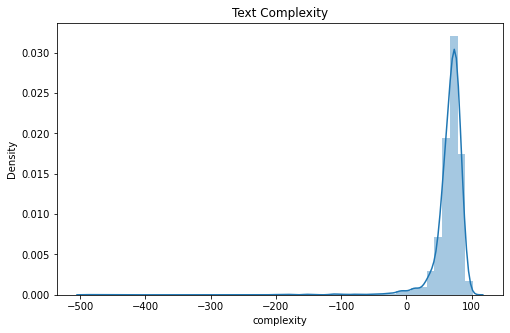

In [39]:
!pip install textstat
clear_output()
from textstat import flesch_reading_ease

train['complexity'] = train['full_text'].apply(lambda x : flesch_reading_ease(x))
plt.figure(figsize = (8,5))
sns.distplot(train['complexity'])
plt.title('Text Complexity')

Let's make a brief comparison depending on the complexity scores given to a text. We're gonna start by examining one with a relatively low score (between 10 - 20). That means, hard to read for a kid.

In [40]:
train['full_text'][3039]

"I'm going to start explaining and giving my opinion, Technology is one of the main reasons, why the world is changing and accommodating with the necessities that the person have, for example: we live in a community that if everything is easier is better, few years ago people had to walk hours or days to go some where, on this days the transport is a lot easier because the technology had increased,  you can use or have your own car or you,  can take the public transport and go everywhere with out problems and if you want to go to another country you can! because the air lines exist now, and you can fly to go to the country you like.  So technology have a positive effect because is helping us to make our daily necessities at home or everywhere better, a reason why i think that is because the future of the students is going to be with more opportunities to learn what they like, with out saying excuses, the help of others is not going to be that necessary with technology in your hands; no

By contrast, let's examine some essays that were given a pretty high score, in terms of complexity. To recap, those are the easiest essays to read.

In [41]:
train['full_text'][2]

"Dear, Principal  If u change the school policy of having a grade b average that unfair. Because many students have a C average. So that means that they cant go out for sports or other activities they want to do bad. That's like taking everything they have. What if kids want to become good at something, but now they cant because of that school policy. If they have a C average they should still be able to go out for sports or activities. A C average isn't that bad, its higher then a D average. If the school police was if you have a D average of lower they shouldn't do sports or activities. If they have a D average in school for not working hard, that's means that they in ain't going to try hard. If they have a C average and there trying hard they should be able to out for sports or activities. What if all the good people in sports have a C average in school, that means that they cant play and were going to lose every game we have. That's a good policy to get grade's up but don't take aw

* The difference in complexity is clear between these two texts. 

However, while most essays have obtained a complexity score between 0 - 100, one incredible insight about the chart we showed before is the ridiculously low score that some texts are given. Let's examine a few of them:

In [42]:
train['full_text'][39]

'my name is Generic_Name and my story is about cars  I bay a car and it new i live that car so mush so i stirt taking caer to it and befor I usto have a buskel and i usto love that baskel so mauh but i gat older so i stop riding a biskel and i stirt looking for a beges thengs whan i was a kid i usto so my dad driveng a car and i usto haveng fun in it  ;and my drimm was to bay a car win i gro up and i stil looking for that drimm seccer is the only sport i like i use to play seccer win i weas 11 years old and i stil play that geame and i love it so mush but my lieg get hert so i stop playing it any moer and then i stirt fling better so i want to go bake to play my favert game seccer so i try ot for school and i stirt making frinds and play with them my favert game evry day i even like a gril becoes that game so l like that gril and i stirt playing wiht her and taking wihe her and i wanted her number so i stirt beang cloes to her so it bean a year so i finly say it i told her that i love 

In [43]:
train['full_text'][272]

"The year book is for to not forget anything and it helps you lot will somtimes people don't like it but for me it helps me lot but we don't the have it any of thoes no more it lets you to not to foget to do your homework and what do have torrmorw and the next week But we have those any more because we are now 8th grades but the kids what year book to show thier family what spots they did even to show kids went to school even to show how there friends looks like and one day there family can met them even I agree to do it like what to show there family what did and there school looks like even for they can rember but also if there friends moves away and we will still rember even to love them so much but still I agree for to do the years book and I'am ok with it and what the year books still and I still love them and miss them lot I want them back and it actlly look good But like we only get them an a year it takes for ever to get and I think to pay to get your own one but I like and the

* As we have appreciated those kind of texts are almost **unreadable**: 
    * In the first one, lots of **bad-written words**.
    * The second one uses some non-sense and **incorrect grammatical structures**. 
    * Both essays have something in common. **There are no punctuation marks !**

## **Sentiment Analysis**

To perform sentiment analysis we'll make use of `TextBlob`. For more detailed information, take a look onto this -> [Tutorial: TextBlob QuickStart](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis)

Text(0.5, 1.0, 'Subjetivity Distribution')

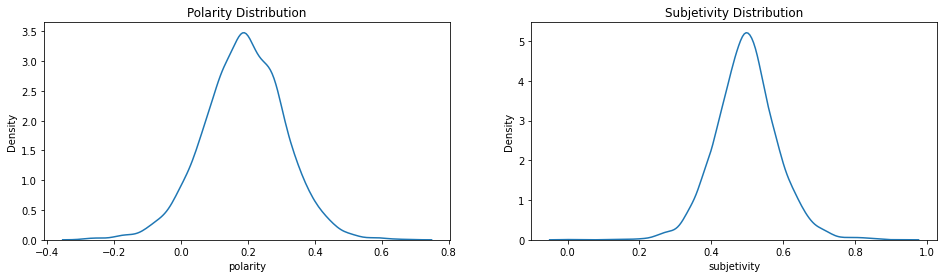

In [44]:
from textblob import TextBlob

train['polarity'] = train['full_text'].apply(lambda x: TextBlob(x).sentiment[0])
train['subjetivity'] = train['full_text'].apply(lambda x: TextBlob(x).sentiment[1])
figure, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
sns.kdeplot(train['polarity'], ax = axes[0])
axes[0].set_title('Polarity Distribution')
sns.kdeplot(train['subjetivity'], ax = axes[1])
axes[1].set_title('Subjetivity Distribution')

---
## <b>3 <span style='color:#3f4d63'>I</span> Modeling</b>
---

Due to competition's submission requirements, I'll create a **new notebook for the whole modeling and submission section. You can continue watching the project here** -> [English language learning | Deberta with W&B](https://www.kaggle.com/javigallego/english-language-learning-deberta-with-w-b). 